<a href="https://colab.research.google.com/github/abhishekv23/EE954-DL/blob/main/Q3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement a CNN backbone model using pytorch. (total 40 marks)

### a. Build a small CNN model consisting of
- 5 convolution Layers with each layer:
1. Convolution layer
2. ReLU activation
3. Max pooling layer

(10 Marks )

In [5]:
#import libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
from torchvision import datasets
from torchvision.transforms import ToTensor, transforms
from torch.utils.data import DataLoader, random_split

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def FMNIST_DataLoader():
  #load MNIST data
  transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.5,), (0.5,))
  ])
  train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)

  # Spilt the Training and Validation dataset in 80%/20%.
  train_size = int(0.8 * len(train_data))
  val_size = int(0.2 * len(train_data))
  #split the train_data into training and validation dataset.
  train_set, val_set = random_split(train_data, [train_size, val_size])

  #load test data set
  test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

  train_dataloader = DataLoader(train_set, batch_size=32, shuffle=True)
  validation_dataloader = DataLoader(val_set, batch_size=32, shuffle=True)
  test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)
  return train_dataloader, validation_dataloader, test_dataloader

In [ ]:
#DEBUG:: no need to execute
print(train_data.train_labels)
print(train_data.data[0])
train_data.train_data

In [ ]:
#DEBUG:: no need to execute
x_train = train_data.data/255
x_test = test_data.data/255
y_train = train_data.targets
y_test = test_data.targets

In [ ]:
#DEBUG:: no need to execute
(x_train, x_valid) = x_train[10000:], x_train[:10000]
(y_train, y_valid) = y_train[10000:], y_train[:10000]
y_train

In [ ]:
#DEBUG:: no need to execute
a = np.array(y_train)
b = np.zeros((a.size, a.max() + 1))
b[np.arange(a.size), a] = 1
b

In [ ]:
#DEBUG:: no need to execute
a1 = np.array(y_valid)
b1 = np.zeros((a1.size, a1.max() + 1))
b1[np.arange(a1.size), a1] = 1
y_train = torch.tensor(b)
y_valid = torch.tensor(b1)
y_valid

In [9]:
class CNN_Model(nn.Module):

    #define init function
    def __init__(self):
        super(CNN_Model, self).__init__()

        #input size: 28
        #channel - 1,
        #32 - output channel from this layer,
        #square kerner of size 2.
        #stride defaults to 1 and padding to 0.
        self.layer1_conv = nn.Conv2d(1, 32, 2, padding=0)
        self.layer1_activ = nn.ReLU()
        self.layer1_maxpool = nn.MaxPool2d(2, stride=2) #2x2 kernel

        #layer 2, input size
        self.layer2_conv = nn.Conv2d(32, 32, 2, padding=0)
        self.layer2_activ = nn.ReLU()
        self.layer2_maxpool = nn.MaxPool2d(2, stride=2)
        #layer 3
        self.layer3_conv = nn.Conv2d(32, 32, 2, padding=0)
        self.layer3_activ = nn.ReLU()
        self.layer3_maxpool = nn.MaxPool2d(2, stride=1) #14x14x64
        #layer 4
        self.layer4_conv = nn.Conv2d(32, 32, 2, padding=1)
        self.layer4_activ = nn.ReLU()
        self.layer4_maxpool = nn.MaxPool2d(2, stride=1) #7x7x128
        #layer 5
        self.layer5_conv = nn.Conv2d(32, 32, 2, padding=1)
        self.layer5_activ = nn.ReLU()
        self.layer5_maxpool = nn.MaxPool2d(2, stride=1) #4x4x256
        #Dense layer, input size=256*

        self.dense1 = nn.Linear(512, 20)
        #output layer
        self.out = nn.Linear(20, 10)

    def forward(self, x):

        #pass data x through 1st layer
        x = self.layer1_conv(x)
        #print(f"shape of data after layer1_conv: {x.shape}")
        x = self.layer1_activ(x)
        x = self.layer1_maxpool(x)
        #print(f"shape of data after layer1_maxpool: {x.shape}")

        #pass data through 2nd layer
        x = self.layer2_conv(x)
        #print(f"shape of data after layer2_conv: {x.shape}")
        x = self.layer2_activ(x)
        x = self.layer2_maxpool(x)
        #print(f"shape of data after layer2_maxpool: {x.shape}")

        #pass data through 3rd layer
        x = self.layer3_conv(x)
        #print(f"shape of data after layer3_conv: {x.shape}")
        x = self.layer3_activ(x)
        x = self.layer3_maxpool(x)
        #print(f"shape of data after layer3_maxpool: {x.shape}")

        #pass data through 4th layer
        x = self.layer4_conv(x)
        #print(f"shape of data after layer4_conv: {x.shape}")
        x = self.layer4_activ(x)
        x = self.layer4_maxpool(x)
        #print(f"shape of data after layer4_maxpool: {x.shape}")

        #pass data through 5th layer
        x = self.layer5_conv(x)
        #print(f"shape of data after layer5_conv: {x.shape}")
        x = self.layer5_activ(x)
        x = self.layer5_maxpool(x)
        #print(f"shape of data after layer5_maxpool: {x.shape}")
        #print(len(x[1]))
        #print(len(x[1][1]))
        #print(len(x[1][1][1]))

        #flatten
        x = x.view(-1, 32*4*4)

        #x = self.flatten = torch.flatten(x)
        #This method will return flattened data that will be passed to Dense layer from Q2
        #following 2 lines will be commented after testing.
        #print(f"shape of data after flatten: {x.shape}")
        x = self.dense1(x)
        x = self.out(x)
        return x

**Invoke dense layer NN**

In [10]:
#DEBUG:: no need to execute
#Returns a tensor filled with random numbers from a uniform distribution on the interval [0, 1)
random_data = torch.rand((32, 1, 28, 28))

cnn_model = CNN_Model()

output_data = cnn_model(random_data)
#print (output_data)


In [18]:
#DEBUG:: no need to execute
trainable_param = 0

for name, param in cnn_model.named_parameters():
    print(name, param.numel())
    trainable_param += param.numel()

print(f"Total trainable parameters {trainable_param}")

layer1_conv.weight 128
layer1_conv.bias 32
layer2_conv.weight 4096
layer2_conv.bias 32
layer3_conv.weight 4096
layer3_conv.bias 32
layer4_conv.weight 4096
layer4_conv.bias 32
layer5_conv.weight 4096
layer5_conv.bias 32
dense1.weight 10240
dense1.bias 20
out.weight 200
out.bias 10
Total trainable parameters 27142


In [ ]:
#DEBUG:: no need to execute
for name, param in cnn_model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

### b. Experiment with different kernel size, number of kernel each layer (10 Marks)
(keep number of filter same in each layer, double it in each layer etc) and settle with a combination which performs the best for the given problem.

In [18]:
#Train the model
def cnn_model_train(train_dataloader, cnn_model, loss_func, optimizer):
    train_data_size = len(train_dataloader.dataset)
    num_batches = len(train_dataloader)
    batch_size = 32
    train_losses = 0
    train_correct = 0

    #set the model to training mode
    cnn_model.train()

    train_c = 0

    for batch, (x_train, y_train) in enumerate(train_dataloader):
      #print(f"Training Batch#::{batch}")
      batch = batch+1
      y_predict = cnn_model(x_train)
      loss = loss_func(y_predict, y_train)

      #backpropagate the prediction loss
      loss.backward()
      #adjust the parameters
      optimizer.step()
      #to reset the gradients of model parameters. Gradients by default add up;
      #to prevent double-counting, we explicitly zero them at each iteration.
      optimizer.zero_grad()

      loss = loss.item()
      #printout training metrics after batch of 100
      if batch % 500 ==0:
        loss, current = loss, batch * batch_size + len(x_train)
        print(f"Training loss: {loss:>2f}  [{current:>5d}/{train_data_size:>5d}]")

      train_losses += loss
    train_losses /=num_batches
    return train_losses, train_correct

In [29]:
#Test the model
def cnn_model_test(dataloader, cnn_model, loss_func):
    #set the model to evaluation (important for BN and Dropout layers)
    cnn_model.eval()
    num_batches = len(dataloader)

    #initialize
    valid_losses = 0
    accuracy = 0
    #ensure that no grad are computed during test mode
    with torch.no_grad():
        for batch, (x_valid, y_valid) in enumerate(dataloader):
          #print(f"Validation Batch#::{batch}")
          batch = batch+1
          predict = cnn_model(x_valid)
          #print(f"predict::{predict}")
          #print(f"y_valid::{y_valid}")
          #print(f"predict.argmax(1)::{predict.argmax(1)}")
          #collect values for accuracy measurement
          accuracy += (predict.argmax(1) == y_valid).type(torch.float).sum().item()
          print(f"Accuracy::{accuracy}")
          valid_loss = loss_func(predict, y_valid)
          valid_loss = valid_loss.item()
          if batch % 500 ==0:
            #valid_loss = valid_loss/num_batches
            print(f"Validation loss: {valid_loss}")

          valid_losses += valid_loss
    valid_losses /=  num_batches
    accuracy /= len(dataloader.dataset)
    return valid_losses, accuracy

In [32]:
# Plot training and validation loss
def plot_losses(train_loss, valid_loss, test_accuracy):
  fig,ax = plt.subplots(1,2,figsize=(16,5))

  ax[0].plot(train_loss,'s-',label='Training')
  ax[0].plot(valid_loss,'o-',label='Validation')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Model loss')
  ax[0].legend()

  ax[1].plot(test_accuracy,'x-',label='Model Accuracy')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  ax[1].set_title('Model Accuracy')
  ax[1].legend()
  plt.show()

In [14]:
train_dataloader, validation_dataloader, test_dataloader = FMNIST_DataLoader()
loss_func = nn.CrossEntropyLoss()

100%|██████████| 26421880/26421880 [00:01<00:00, 18343470.28it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 308609.98it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 2094875.97it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14366119.09it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### c. Try different weight initialization methods (random, Xavier, He) (5 Marks)

In [ ]:
#instantiate the model
cnn_model_xavier = CNN_Model()
for param in cnn_model_xavier.named_parameters():
    print("PARAM0:",param[0])
    print("PARAM1:",param[1])
    if 'weight' in param[0]:
        torch.nn.init.xavier_normal_(param[1].data)

# Train new instance of the model

# Test the new instance of the model


## initialize the weights using He algorithms, also called as Kaiming


In [ ]:
#instantiate the model
cnn_model_he = CNN_Model()
for param in cnn_model_he.named_parameters():
    #print("PARAM0:",param[0])
    #print("PARAM1:",param[1])
    if 'weight' in param[0]:
        #Parameter initialization logic
        torch.nn.init.kaiming_normal_(param[1].data)

# Train new instance of the model

# Test the new instance of the model


## Random initialization of weights

In [ ]:
#start the training and validation loop
epochs = 20
cnn_model = CNN_Model()
#Initialize Optimizer and Loss function
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.0005)
train_loss_arr = []
valid_loss_ar = []
valid_acc = []
test_accuracy = []
for e in range(epochs):
  train_loss, _ = cnn_model_train(train_dataloader, cnn_model, loss_func, optimizer)
  valid_loss, valid_acc = cnn_model_test(validation_dataloader, cnn_model, loss_func)
  test_loss, test_acc = cnn_model_test(test_dataloader, cnn_model, loss_func)
  test_accuracy.append(test_acc)
  train_loss_arr.append(train_loss)
  valid_loss_ar.append(valid_loss)

### d. After extracting feature from CNN model use MLP for classification (15 Marks)

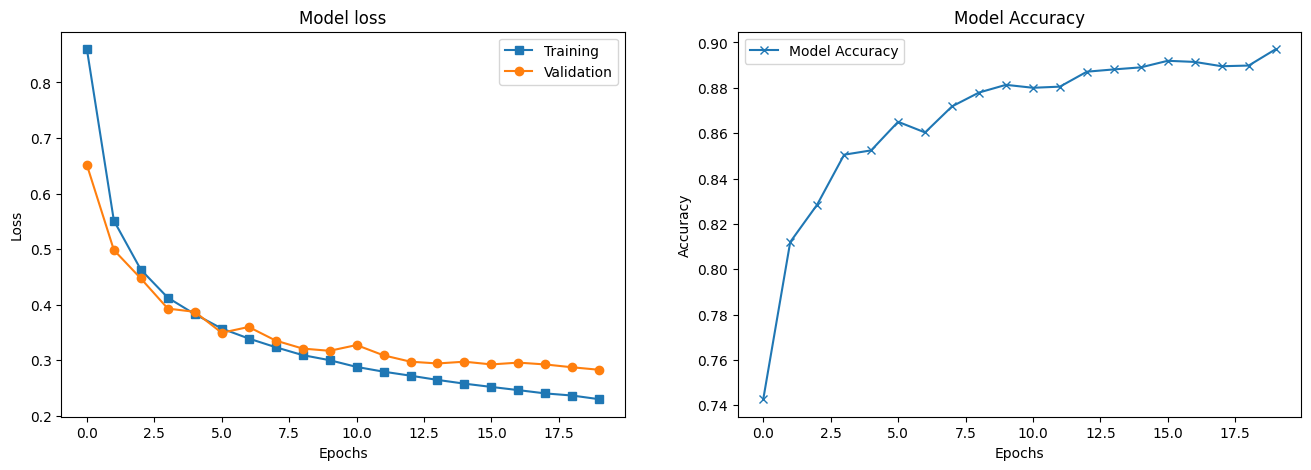

In [33]:
#plot losses and model accuracy
plot_losses(train_loss_arr, valid_loss_ar, test_accuracy)

In [24]:
print(test_accuracy)

[0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897]
